# FATES MRV IFS sites

#### Libraries

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import math as m
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Read in the data from Mexico's National Forest and Soils  Inventory (INFyS)
- Note we are using 2015-2020 data
- We only read in plots from the state of Puebla
- We could filter by altitude? 

In [2]:
df_all = pd.read_csv('/Users/JFNeedham/Desktop/INFyS_2015_2020_Puebla_subset.csv', low_memory=False)
df_all = df_all.dropna(subset=['Genus'])

In [3]:
df_all.head(10)

,Genus,Species,dbh,height,CA,agb,Latin
0,Mimosa,benthamii,8.7,5.2,5.105100,15.266167,Mimosa benthamii
1,Mimosa,benthamii,8.9,4.9,7.068600,15.947983,Mimosa benthamii
2,unknown,unknown,21.0,0.2,999993.000000,1.926283,unknown unknown
3,unknown,unknown,11.8,0.2,999993.000000,0.608199,unknown unknown
4,Heliocarpus,velutinus,9.5,5.8,6.377448,16.354435,Heliocarpus velutinus
5,Mimosa,benthamii,10.7,6.0,9.079224,22.724136,Mimosa benthamii
6,Lysiloma,acapulcense,11.4,5.1,8.042496,51.168932,Lysiloma acapulcense
7,Garrya,unknown,13.5,5.6,9.896040,45.231000,Garrya unknown
8,unknown,unknown,8.4,1.4,999991.000000,1.438291,unknown unknown
9,Bursera,unknown,20.9,7.2,8.042496,40.998185,Bursera unknown


#### Evergreen PFT - pines and firs known to be in the San Rafael site

In [4]:
species = ['Pinus teocote','Pinus montezumae','Pinus leiophylla','Pinus hartwegii','Abies religiosa', 'Pinus ayacahuite']
evergreen = df_all[df_all['Latin'].str.contains('|'.join(species))]
print(len(evergreen))
evergreen.head(5)

507


,Genus,Species,dbh,height,CA,agb,Latin
4426,Pinus,leiophylla,39.3,13.1,52.166268,758.795199,Pinus leiophylla
4970,Pinus,hartwegii,27.3,10.2,15.550920,234.177315,Pinus hartwegii
5096,Abies,religiosa,24.5,20.1,12.566400,252.100646,Abies religiosa
5097,Abies,religiosa,35.1,27.2,33.693660,622.237774,Abies religiosa
5098,Abies,religiosa,20.8,8.2,29.703828,167.067798,Abies religiosa


#### Oaks 

In [5]:
oaks = df_all[df_all['Genus'].str.contains('Quercus')]
print(len(oaks))
oaks.head(5)

1673


,Genus,Species,dbh,height,CA,agb,Latin
93,Quercus,unknown,10.6,5.1,12.880560,29.149596,Quercus unknown
151,Quercus,glaucoides,24.4,6.0,16.619064,182.869626,Quercus glaucoides
152,Quercus,unknown,8.0,6.0,1.649340,14.877727,Quercus unknown
153,Quercus,unknown,22.3,7.9,9.896040,172.424966,Quercus unknown
156,Quercus,glaucoides,29.7,4.2,15.550920,333.103946,Quercus glaucoides


### Functions

In [6]:
def d2hmc (d, p1, p2, p3) :
    h = (p1 * d**p2) / (p3 + d**p2)
    return h

initial_guess_h = [58.0, 0.73, 21.8]


In [7]:
def d2ca (d, p1, p2) :
    ca = p1 * d ** p2
    return ca

initial_guess_ca = [0.07, 1.3]

### Height

In [8]:
evg_h = evergreen.dropna(subset=['height', 'dbh'])
# remove outliers
evg_h = evg_h[evg_h['dbh'] < 1000]
dbh_evg_h = np.arange(1,evg_h['dbh'].max(),1)

height_ps_evg, height_cov_evg = curve_fit(f=d2hmc, xdata=np.array(evg_h['dbh']), ydata=np.array(evg_h['height']),
                                           p0=initial_guess_h)
evg_curve_h = [d2hmc(d, height_ps_evg[0], height_ps_evg[1], height_ps_evg[2])  for  d  in dbh_evg_h]
print(height_ps_evg)


[47.02238834  1.01099235 61.65702984]


In [9]:
oak_h = oaks.dropna(subset=['height', 'dbh'])
# remove outliers
oak_h = oak_h[oak_h['dbh'] < 1000]
oak_h = oak_h[oak_h['height'] < 1000]
dbh_oak_h = np.arange(1,oak_h['dbh'].max(),1)

height_ps_oak, height_cov_oak = curve_fit(f=d2hmc, xdata=np.array(oak_h['dbh']), ydata=np.array(oak_h['height']),
                                           p0=initial_guess_h)
oak_curve_h = [d2hmc(d, height_ps_oak[0], height_ps_oak[1], height_ps_oak[2])  for  d  in dbh_oak_h]
print(height_ps_oak)

[4.65190002e+06 5.45156688e-01 2.78119229e+06]


Text(0.5, 0, 'DBH (cm)')

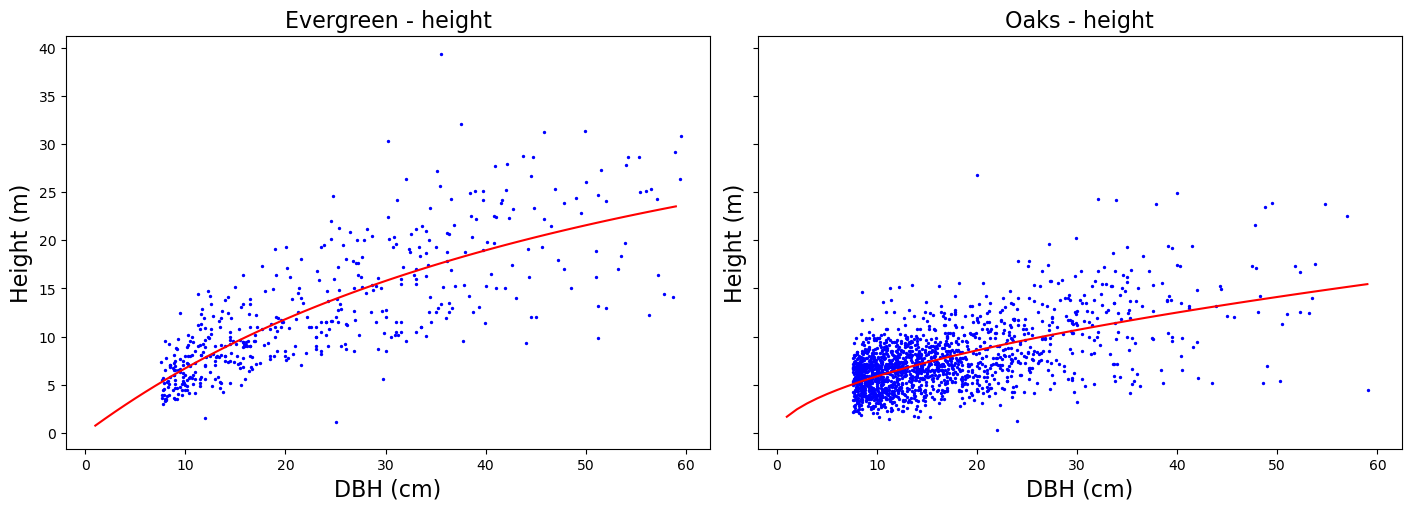

In [10]:
fig, ((fax0,fax1)) = plt.subplots(nrows=1, ncols=2, figsize=(14,5), sharey=True, sharex=True, constrained_layout=True)

fax0.scatter(evg_h.dbh, evg_h.height, c='blue', s=2)
fax0.plot(dbh_evg_h, evg_curve_h, color='red')
fax0.set_title('Evergreen - height', fontsize=16)
fax0.set_ylabel('Height (m)', fontsize=16)
fax0.set_xlabel('DBH (cm)', fontsize=16)

fax1.scatter(oak_h.dbh, oak_h.height, c='blue', s=2)
fax1.plot(dbh_oak_h, oak_curve_h, color='red')
fax1.set_title('Oaks - height', fontsize=16)
fax1.set_ylabel('Height (m)', fontsize=16)
fax1.set_xlabel('DBH (cm)', fontsize=16)



### Crown area 

In [11]:
evg_ca = evergreen.dropna(subset=['CA','dbh'])
# remove outliers
evg_ca = evg_ca[evg_ca['dbh'] < 1000]
evg_ca = evg_ca[evg_ca['CA'] < 1000]
dbh_evg_ca = np.arange(1,evg_ca['dbh'].max(),1)

ca_ps_evg, ca_cov_evg = curve_fit(f=d2ca, xdata=np.array(evg_ca['dbh']), ydata=np.array(evg_ca['CA']), p0=initial_guess_ca)

evg_curve_ca = [d2ca(d, ca_ps_evg[0], ca_ps_evg[1])  for  d  in dbh_evg_ca]

print(ca_ps_evg)

[0.41284662 1.24382974]


In [12]:
oak_ca = oaks.dropna(subset=['CA','dbh'])
# remove outliers
oak_ca = oak_ca[oak_ca['dbh'] < 1000]
oak_ca = oak_ca[oak_ca['CA'] < 1000]
dbh_oak_ca = np.arange(1,oak_ca['dbh'].max(),1)

ca_ps_oak, ca_cov_oak = curve_fit(f=d2ca, xdata=np.array(oak_ca['dbh']), ydata=np.array(oak_ca['CA']), p0=initial_guess_ca)

oak_curve_ca = [d2ca(d, ca_ps_oak[0], ca_ps_oak[1])  for  d  in dbh_oak_ca]

print(ca_ps_oak)

[0.59158659 1.15360042]


Text(0.5, 0, 'DBH (cm)')

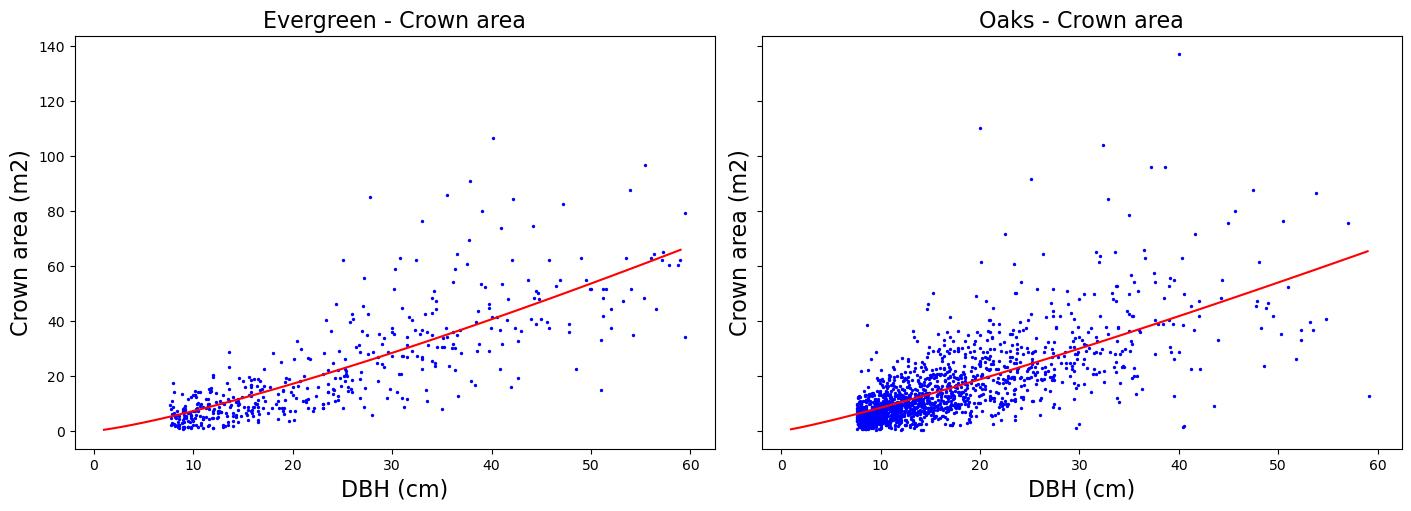

In [13]:
fig, ((fax0,fax1)) = plt.subplots(nrows=1, ncols=2, figsize=(14,5), sharey=True, sharex=True, constrained_layout=True)

fax0.scatter(evg_ca.dbh, evg_ca.CA, c='blue', s=2)
fax0.plot(dbh_evg_ca, evg_curve_ca, color='red')
fax0.set_title('Evergreen - Crown area', fontsize=16)
fax0.set_ylabel('Crown area (m2)', fontsize=16)
fax0.set_xlabel('DBH (cm)', fontsize=16)

fax1.scatter(oak_ca.dbh, oak_ca.CA, c='blue', s=2)
fax1.plot(dbh_oak_ca, oak_curve_ca, color='red')
fax1.set_title('Oaks - Crown area', fontsize=16)
fax1.set_ylabel('Crown area (m2)', fontsize=16)
fax1.set_xlabel('DBH (cm)', fontsize=16)

